In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from openpyxl import load_workbook

plt.style.use("ggplot")

In [2]:
st_yr, end_yr = 1990, 2017

In [3]:
def read_ospar_row(row_num, ws, year):
    """Read a row from the OSPAR template."""
    pars = ws["E9":"AK9"]
    vals = ws[f"E{row_num}":f"AK{row_num}"]

    df = pd.DataFrame(
        {"par": [c.value for c in pars[0]], "value": [c.value for c in vals[0]]}
    )
    df["year"] = year
    df.dropna(how="any", inplace=True)
    df = df.query("value != 0")

    return df

## Lofoten-Barents Sea

In [4]:
dd_list = []
riv_list = []

for year in range(st_yr, end_yr + 1):
    xl_path = f"../../../Results/OSPAR/01_OSPAR_Norway_{year}.xlsx"
    wb = load_workbook(filename=xl_path)

    # Direct discharges
    ws = wb["5e"]
    dd_df = read_ospar_row(30, ws, year)
    dd_list.append(dd_df)

    # Riverine inputs
    ws = wb["6c"]
    riv_df = read_ospar_row(38, ws, year)
    riv_list.append(riv_df)

dd_df = pd.concat(dd_list, axis="rows")
riv_df = pd.concat(riv_list, axis="rows")

pars = ["N-Total", "P-Total", "TOC", "NH4-N"]
dd_df = dd_df.query("par in @pars")
riv_df = riv_df.query("par in @pars")

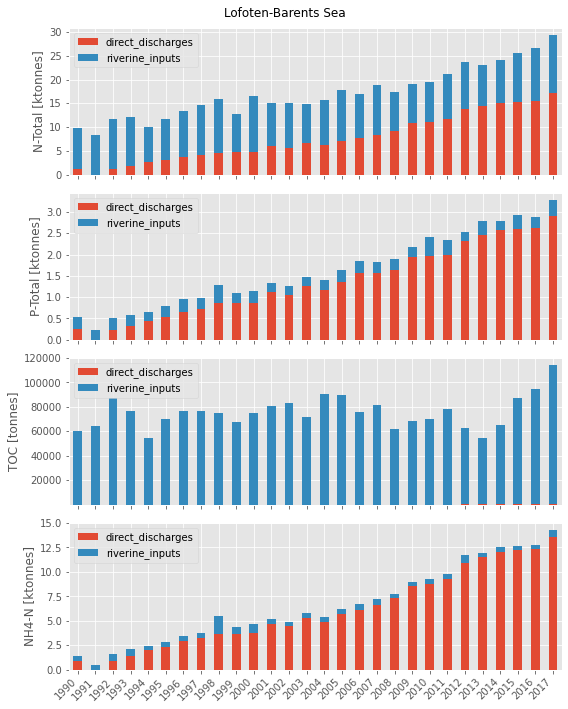

In [5]:
# Plot
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(8, 10), sharex=True, sharey=False)
yr_df = pd.DataFrame({"year": range(st_yr, end_yr + 1)})

for idx, par in enumerate(pars):
    df = pd.merge(yr_df, dd_df.query("par == @par"), on="year", how="left")
    df = pd.merge(
        df,
        riv_df.query("par == @par"),
        on="year",
        how="left",
        suffixes=["_direct", "_riverine"],
    )

    del df["par_direct"], df["par_riverine"]
    df.fillna(0, inplace=True)
    df.rename(
        {"value_direct": "direct_discharges", "value_riverine": "riverine_inputs"},
        inplace=True,
        axis="columns",
    )
    df.set_index("year", inplace=True)

    df.plot(kind="bar", stacked=True, ax=axes[idx], rot=45)
    axes[idx].set_xticklabels(df.index, rotation=45, ha="right")

    if par == "TOC":
        unit = "tonnes"
    else:
        unit = "ktonnes"
    # axes[idx].set_title(par)
    axes[idx].set_xlabel("")
    axes[idx].set_ylabel(f"{par} [{unit}]")

plt.suptitle("Lofoten-Barents Sea")
plt.tight_layout()
plt.savefig("../../../Results/OSPAR/loftoen_barents_sea.png", dpi=200, bbox_inches="tight")

## Norwegian Sea 2

In [6]:
dd_list = []
riv_list = []

for year in range(st_yr, end_yr + 1):
    xl_path = f"../../../Results/OSPAR/01_OSPAR_Norway_{year}.xlsx"
    wb = load_workbook(filename=xl_path)

    # Direct discharges
    ws = wb["5e"]
    dd_df = read_ospar_row(22, ws, year)
    dd_list.append(dd_df)

    # Riverine inputs
    ws = wb["6c"]
    riv_df = read_ospar_row(26, ws, year)
    riv_list.append(riv_df)

dd_df = pd.concat(dd_list, axis="rows")
riv_df = pd.concat(riv_list, axis="rows")

pars = ["N-Total", "P-Total", "TOC", "NH4-N"]
dd_df = dd_df.query("par in @pars")
riv_df = riv_df.query("par in @pars")

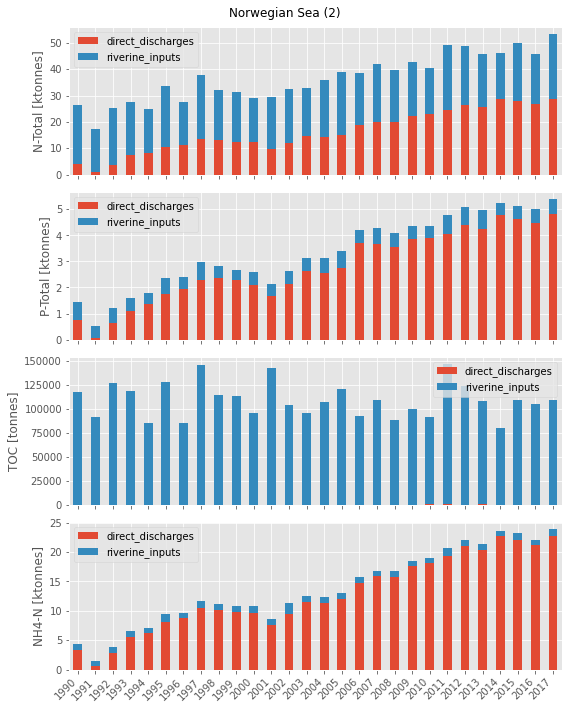

In [7]:
# Plot
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(8, 10), sharex=True, sharey=False)
yr_df = pd.DataFrame({"year": range(st_yr, end_yr + 1)})

for idx, par in enumerate(pars):
    df = pd.merge(yr_df, dd_df.query("par == @par"), on="year", how="left")
    df = pd.merge(
        df,
        riv_df.query("par == @par"),
        on="year",
        how="left",
        suffixes=["_direct", "_riverine"],
    )

    del df["par_direct"], df["par_riverine"]
    df.fillna(0, inplace=True)
    df.rename(
        {"value_direct": "direct_discharges", "value_riverine": "riverine_inputs"},
        inplace=True,
        axis="columns",
    )
    df.set_index("year", inplace=True)

    df.plot(kind="bar", stacked=True, ax=axes[idx], rot=45)
    axes[idx].set_xticklabels(df.index, rotation=45, ha="right")

    if par == "TOC":
        unit = "tonnes"
    else:
        unit = "ktonnes"
    # axes[idx].set_title(par)
    axes[idx].set_xlabel("")
    axes[idx].set_ylabel(f"{par} [{unit}]")

plt.suptitle("Norwegian Sea (2)")
plt.tight_layout()
plt.savefig("../../../Results/OSPAR/norwegian_sea_2.png", dpi=200, bbox_inches="tight")